In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
#nltk.download('all')

Importing and trimming twitter sentiment dataset

Insert header, remove numbers, usernames, and NO_QUERY

Move first row that became header down to data, add headers

In [5]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",names=["score","id","datetime","NO_QUERY","usernames","tweet"])

df = df.drop(['id','NO_QUERY','usernames'],axis=1)

df.head()

,score,datetime,tweet
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


Checking count values, dataset listed from 0 = negative to 4 = positive. 

In [6]:
df.shape

(1600000, 3)

In [7]:
df['score'].value_counts()

4    800000
0    800000
Name: score, dtype: int64

Clean up links, @users, hastags

In [8]:
stopwords = nltk.corpus.stopwords.words("english")

def cleanup(text):
    clean = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(text)).split()
    tokens = []
    for token in clean:
        if token not in stopwords:
            tokens.append(token)
    return tokens

In [9]:
df['tweet'] = df['tweet'].apply(lambda x: cleanup(x))

df.head()

,score,datetime,tweet
0,0,Mon Apr 06 22:19:45 PDT 2009,"[Awww, bummer, You, shoulda, got, David, Carr,..."
1,0,Mon Apr 06 22:19:49 PDT 2009,"[upset, update, Facebook, texting, might, cry,..."
2,0,Mon Apr 06 22:19:53 PDT 2009,"[I, dived, many, times, ball, Managed, save, 5..."
3,0,Mon Apr 06 22:19:57 PDT 2009,"[whole, body, feels, itchy, like, fire]"
4,0,Mon Apr 06 22:19:57 PDT 2009,"[behaving, mad, I, see]"


In [10]:
def to_tuple(x):
    subset = x[['tweet','score']]
    tuples = [tuple(i) for i in subset.to_numpy()]
    return tuples

In [11]:
documents = to_tuple(df)
documents[0]

(['Awww',
  'bummer',
  'You',
  'shoulda',
  'got',
  'David',
  'Carr',
  'Third',
  'Day',
  'D'],
 0)

In [12]:
def word_master(x):
    master_list = []
    for i in range(len(x)):
        master_list += x['tweet'][i]
    return master_list

words = word_master(df)

#word_features = nltk.FreqDist(w.lower() for w in words).most_common(2000)
#word_features[0:5]

word_features = nltk.FreqDist(w.lower() for w in words).most_common(500)
word_features = [word_tuple[0] for word_tuple in word_features]
word_features

['i',
 'good',
 'day',
 'get',
 'like',
 'go',
 'quot',
 'today',
 'work',
 'love',
 'going',
 'got',
 'lol',
 'time',
 'back',
 'u',
 'one',
 'know',
 'im',
 'really',
 'amp',
 'see',
 'night',
 'still',
 'it',
 '2',
 'well',
 'new',
 'want',
 'think',
 'home',
 'thanks',
 'oh',
 'much',
 'miss',
 'need',
 'last',
 'morning',
 'tomorrow',
 'hope',
 'great',
 'my',
 'the',
 '3',
 'twitter',
 'you',
 'haha',
 'feel',
 'sad',
 'fun',
 'just',
 'wish',
 'sleep',
 'right',
 'bad',
 'would',
 'happy',
 'sorry',
 'tonight',
 'come',
 'make',
 'way',
 'getting',
 'though',
 'gonna',
 'nice',
 'better',
 'watching',
 'yeah',
 'so',
 'wait',
 'bed',
 'could',
 'week',
 'and',
 'school',
 'people',
 'but',
 'hate',
 'days',
 'even',
 'hey',
 '4',
 'yes',
 'next',
 'no',
 'lt',
 'weekend',
 'awesome',
 'dont',
 'thank',
 'that',
 'never',
 'soon',
 'cant',
 'long',
 'take',
 'little',
 'working',
 'first',
 'wanna',
 'please',
 'say',
 'best',
 'tired',
 'everyone',
 'show',
 'ok',
 'life',
 'sic

In [13]:
def document_features(document):    
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains('+ word +')'] = (word in document_words)
    return features

featuresets = [(document_features(d), c) for (d,c) in documents]

In [14]:
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

classifier.show_most_informative_features(10)

0.6
Most Informative Features
           contains(sad) = True                0 : 4      =     18.0 : 1.0
         contains(hurts) = True                0 : 4      =     15.9 : 1.0
      contains(headache) = True                0 : 4      =     12.4 : 1.0
       contains(welcome) = True                4 : 0      =     11.7 : 1.0
          contains(sick) = True                0 : 4      =     10.3 : 1.0
         contains(sucks) = True                0 : 4      =      9.9 : 1.0
           contains(www) = True                4 : 0      =      9.7 : 1.0
          contains(poor) = True                0 : 4      =      8.9 : 1.0
           contains(ugh) = True                0 : 4      =      7.9 : 1.0
         contains(broke) = True                0 : 4      =      7.3 : 1.0


In [15]:
df_news = pd.read_csv(r'news.csv')
df_news.head()

,Text
0,NOPD investigates the scene of a shooting near...
1,"CLARKSVILLE, Tenn. – Two men were shot dead an..."
2,Police say four people were injured in a shoot...
3,(WMC) - Volunteers turned out to take back the...
4,The DNAinfo archives brought to you by WNYC.Re...


In [16]:
def to_string(x):
    subset = x['Text']
    strings = [str(i) for i in subset.to_numpy()]
    return strings

strings = to_string(df_news)
strings

["NOPD investigates the scene of a shooting near the intersection of New Orleans and N. Rocheblave streets in New Orleans Wednesday, August 13, 2014. (Photo by Brent Duke,NOLA.com| The Times-Picayune)NOPD investigates the scene of a shooting near the intersection of New Orleans and N. Rocheblave streets in New Orleans Wednesday, August 13, 2014. (Photo by Brent Duke,NOLA.com| The Times-Picayune)NOPD investigates the scene of a shooting near the intersection of New Orleans and N. Rocheblave streets in New Orleans Wednesday, August 13, 2014. (Photo by Brent Duke,NOLA.com| The Times-Picayune)NOPD investigates the scene of a shooting near the intersection of New Orleans and N. Rocheblave streets in New Orleans Wednesday, August 13, 2014. (Photo by Brent Duke,NOLA.com| The Times-Picayune)NOPD investigates the scene of a shooting near the intersection of New Orleans and N. Rocheblave streets in New Orleans Wednesday, August 13, 2014. (Photo by Brent Duke,NOLA.com| The Times-Picayune)NOPD inv

In [17]:
from nltk.tokenize import sent_tokenize

asdf = sent_tokenize(strings[49])
asdf

['KTLAby:John A. Moreno(Credit: KTLA)A shooting in the Vermont Vista neighborhood of South Los Angeles on Saturday left one man dead and three other people wounded, police said.The incident happened about 4:20 p.m. in the 8800 block of South Figueroa Street (map), where one female and three male victims were struck by gunfire, said Sgt.',
 'John Gregozek of the Los Angeles Police Department’s Southeast Division.One of the victims, a 26-year-old man, died at the scene, according to Gregozek.',
 'Two of the injured — one male and one female — were transported to hospitals in unknown condition.The fourth victim, a male who likely suffered a graze wound, was treated at the scene and released, the LAPD said.Police described the shooter or shooters as one or two black men.It was unknown whether the incident was gang related, Gregozek said.SubmitCopyright 2021 Nexstar Media Inc. All rights reserved.',
 "This material may not be published, broadcast, rewritten, or redistributed.Stars are prepa

In [18]:
article_no = []
sentences = []

for i in range(len(strings)):
    s = sent_tokenize(strings[i])
    for z in range(len(s)):
        article_no.append(i)
        sentences.append(s[z])

list_of_tuples = list(zip(article_no,sentences))

df_new = pd.DataFrame(list_of_tuples, columns = ['article_id','sentences'])
df_new.shape

(425, 2)

In [19]:
df_new['sentences'] = df_new['sentences'].apply(lambda x: cleanup(x))

df_new.head()

,article_id,sentences
0,0,"[NOPD, investigates, scene, shooting, near, in..."
1,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi..."
2,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi..."
3,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi..."
4,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi..."


In [20]:
classifier.classify(document_features(df_new['sentences'][0]))

4

In [21]:
sent_score = []
for i in range(len(df_new)):
    prediction = classifier.classify(document_features(df_new['sentences'][i]))
    sent_score.append(prediction)
    
df_new['sentence score'] = sent_score
df_new

,article_id,sentences,sentence score
0,0,"[NOPD, investigates, scene, shooting, near, in...",4
1,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi...",4
2,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi...",4
3,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi...",4
4,0,"[Photo, Brent, Duke, NOLA, com, The, Times, Pi...",4
...,...,...,...
420,49,"[KTLAby, John, A, Moreno, Credit, KTLA, A, sho...",0
421,49,"[John, Gregozek, Los, Angeles, Police, Departm...",0
422,49,"[Two, injured, one, male, one, female, transpo...",4
423,49,"[This, material, may, published, broadcast, re...",0


In [22]:
article_id_count = 0

four_count = 0
total_count = 0

pos = []
tot = []
    
for i in range(len(df_new)):
    if df_new['article_id'][i] == article_id_count:
        total_count += 1
        if df_new['sentence score'][i] == 4:
            four_count += 1
    else:
        pos.append(four_count)
        tot.append(total_count)
        four_count = 0
        total_count = 1
        article_id_count += 1

print(pos)
print(tot)

[15, 18, 1, 4, 1, 4, 0, 2, 7, 6, 5, 6, 4, 3, 24, 4, 1, 6, 4, 17, 4, 2, 2, 0, 0, 8, 0, 3, 0, 5, 2, 0, 5, 4, 4, 3, 0, 6, 0, 5, 5, 1, 0, 9, 4, 0, 3, 0, 3]
[16, 41, 3, 10, 6, 5, 1, 3, 10, 15, 9, 17, 9, 8, 35, 10, 4, 9, 7, 27, 6, 4, 5, 1, 2, 20, 1, 4, 1, 12, 3, 1, 7, 10, 7, 4, 1, 13, 1, 9, 14, 3, 1, 19, 7, 3, 10, 1, 5]


In [23]:
df_news.drop(df_news.tail(1).index,inplace = True)

In [24]:
posp = []
negp = []

for i in range(len(pos)):
    positive = pos[i]/tot[i]
    posp.append(positive)
    negp.append(1 - positive)

df_news['positive %'] = posp
df_news['negative %'] = negp
    
df_news.head()

,Text,positive %,negative %
0,NOPD investigates the scene of a shooting near...,0.937500,0.062500
1,"CLARKSVILLE, Tenn. – Two men were shot dead an...",0.439024,0.560976
2,Police say four people were injured in a shoot...,0.333333,0.666667
3,(WMC) - Volunteers turned out to take back the...,0.400000,0.600000
4,The DNAinfo archives brought to you by WNYC.Re...,0.166667,0.833333


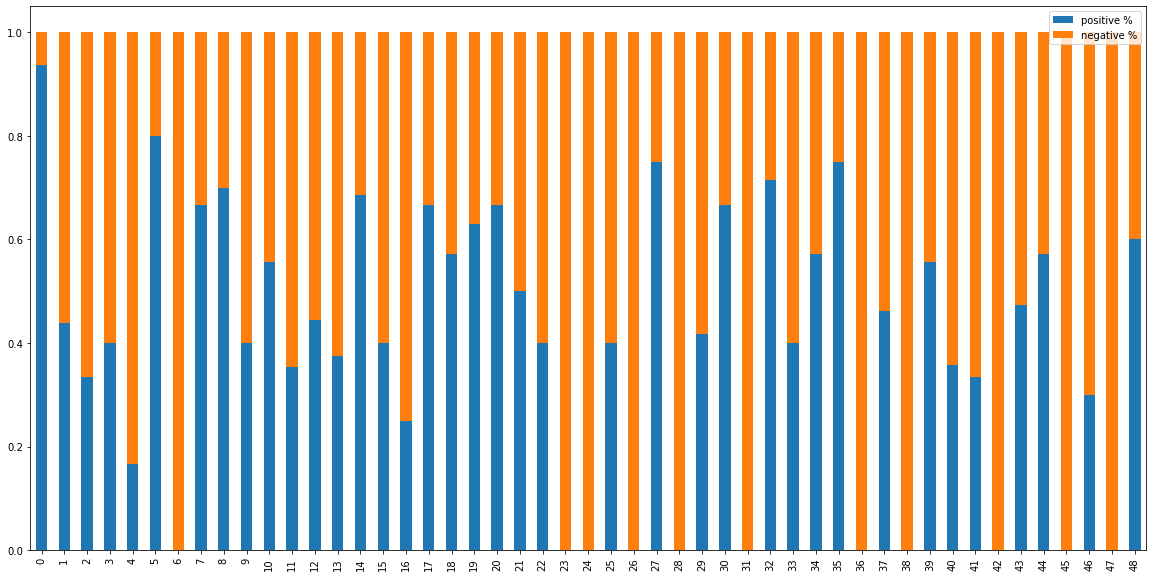

In [26]:
ax = df_news.plot.bar(stacked = True, figsize = (20,10))